In [1]:
import torch

print(torch.__version__)

2.0.1+cu118


In [2]:
# 测试GPU是否可用.
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

True
NVIDIA GeForce GTX 1650


#### 创建张量

In [3]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(type(a), type(b))
print(type(t_a), type(t_b))
print(t_a, t_b)

<class 'list'> <class 'numpy.ndarray'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1, 2, 3]) tensor([4, 5, 6], dtype=torch.int32)


In [4]:
# 查看b和t_b的形状.
print(b.shape, t_b.shape)

(3,) torch.Size([3])


In [5]:
t_ones = torch.ones(2, 3)
t_ones.shape

torch.Size([2, 3])

In [6]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [7]:
# 创建一个由随机数组成的张量.
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.4418, 0.0213, 0.6758],
        [0.5020, 0.4413, 0.9850]])


In [8]:
print(rand_tensor.mean(), rand_tensor.std())

tensor(0.5112) tensor(0.3167)


#### 更改张量形状与数据类型

In [9]:
# torch.to方法可以更改张量数据类型.
t_a_new = t_a.to(torch.int64)
print(t_a.dtype, t_a_new.dtype)

torch.int64 torch.int64


In [10]:
t_b_new = t_b.to(torch.int64)
print(t_b.dtype, t_b_new.dtype)

torch.int32 torch.int64


In [11]:
# 张量形状操作.
"""
 * (Tensor input, int dim0, int dim1)
 * (Tensor input, name dim0, name dim1)
"""
t = torch.rand(3, 5)
t_tr = torch.transpose(t)
t_tr

TypeError: transpose() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim0, int dim1)
 * (Tensor input, name dim0, name dim1)


In [12]:
t = torch.rand(3, 5)
print(t)
# 0 和 1 表示要交换的维度；
# 这里将行和列进行交换，得到一个形状为 (5, 3) 的新张量.
t_tr = torch.transpose(t, 0, 1)
t_tr

tensor([[0.4740, 0.8067, 0.7792, 0.3002, 0.6280],
        [0.7098, 0.5156, 0.5644, 0.1719, 0.5620],
        [0.3640, 0.9586, 0.9733, 0.2243, 0.6232]])


tensor([[0.4740, 0.7098, 0.3640],
        [0.8067, 0.5156, 0.9586],
        [0.7792, 0.5644, 0.9733],
        [0.3002, 0.1719, 0.2243],
        [0.6280, 0.5620, 0.6232]])

In [13]:
print(t.shape, '---->', t_tr.shape)

torch.Size([3, 5]) ----> torch.Size([5, 3])


In [14]:
# reshape一个张量.
t = torch.zeros(30)
print(t.shape)

t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([30])
torch.Size([5, 6])


In [15]:
print(t_reshape.size)

<built-in method size of Tensor object at 0x000001EA94150F40>


In [16]:
print(t_reshape.size())

torch.Size([5, 6])


In [17]:
# 移除无用的维度.
t = torch.zeros(1, 2, 1, 4, 1)
print(t.shape)

t_sqz = torch.squeeze(t, 2)
print(t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])
torch.Size([1, 2, 4, 1])


#### 对张量执行数学运算

In [18]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2  = torch.normal(mean=0, std=1, size=(5, 2))
# t1, t2的shape相同，执行元素级乘法.
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [19]:
# 计算均值、标准差.
print(t1)
t4 = torch.mean(t1, axis=1)
print(t4)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])


In [20]:
print(t1)
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([-0.1373,  0.2028])


In [21]:
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [22]:
# 计算矩阵乘法.
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [23]:
# 计算Lp范数.
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


#### 拆分、堆叠和拼接张量

In [24]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

t_splits = torch.chunk(t, 3)
print(type(t_splits))
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
<class 'tuple'>


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [25]:
for item in t_splits:
    print(item)
    print(item.numpy())

tensor([0.7576, 0.2793])
[0.758 0.279]
tensor([0.4031, 0.7347])
[0.403 0.735]
tensor([0.0293, 0.7999])
[0.029 0.8  ]


In [26]:
torch.manual_seed(1)
t = torch.rand(5)

t_splits = torch.chunk(t, 3)
print(type(t_splits))
[item.numpy() for item in t_splits]

<class 'tuple'>


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029], dtype=float32)]

In [27]:
# 提供一个需要分割得到的size.
torch.manual_seed(1)
t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [28]:
# 拼接.
A = torch.ones(3)
B = torch.zeros(3)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0., 0.])


In [29]:
A = torch.ones(3)
B = torch.zeros(3)

C = torch.stack([A, B], axis=1)
print(C)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


#### 使用Pytorch创建输入管道

In [2]:
# 从张量创建Pytorch DataLoader.
import torch
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [3]:
# 从上述数据集创建batches.
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [4]:
# 将两个张量组合成数据集.
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [5]:
# Create a joint dataset.
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [6]:
"""
一个自定义的Dataset class不要包含有：

    * __init__(): 这是初始逻辑发生的地方，例如读取现有数组、加载文件、过滤数据等;

    * __getitem__(): 用于返回给定索引对应的样本;
"""

# 创建一个joint dataset.
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

In [7]:
# 打印每个样本.
for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


In [8]:
"""
如果第二个数据集是张量形式的标记数据集， 可以简单实现如下：
"""
joint_dataset = TensorDataset(t_x, t_y)

#### Shuffle, batch, repeat

In [9]:
torch.manual_seed(1)

data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n    y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
    y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
    y: tensor([1, 3])


In [10]:
"""
从上述结果可以看出，数据行被打乱，但是保持了x和y的对应关系.
在历经多个Epochs模型训练时，示例如下：
"""
for epoch in range(2):
    print(f'epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n    y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
    y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
    y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
    y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
    y: tensor([0, 1])


#### 从本地磁盘文件创建数据集

In [11]:
import pathlib

imgdir_path = pathlib.Path('../Python-MachineLearning/Datasets/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['..\\Python-MachineLearning\\Datasets\\cat_dog_images\\cat-01.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\cat-02.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\cat-03.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\dog-01.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\dog-02.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


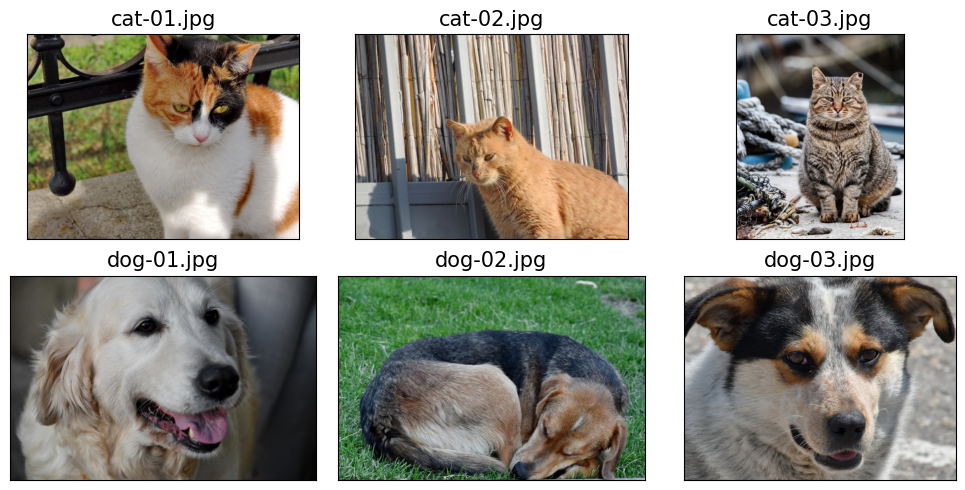

In [15]:
# 可视化.
import matplotlib.pyplot as plt
import os 
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    """
    os.path.basename用于获取字符串中的基本文件名部分.
    返回路径中最后一个斜杠“\或者/”之后的部分,即文件名.
    """
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

从上图中可以看出，图片的标签位于图片文件名中，同时各图像大小尺寸不一致.

In [16]:
labels = [1 if 'dog' in 
            os.path.basename(file) else 0
                for file in file_list]

print(labels)

[0, 0, 0, 1, 1, 1]


In [17]:
# 创建一个joint dataset.
# list of filenames and their labels.
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels)

In [18]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

..\Python-MachineLearning\Datasets\cat_dog_images\cat-01.jpg 0
..\Python-MachineLearning\Datasets\cat_dog_images\cat-02.jpg 0
..\Python-MachineLearning\Datasets\cat_dog_images\cat-03.jpg 0
..\Python-MachineLearning\Datasets\cat_dog_images\dog-01.jpg 1
..\Python-MachineLearning\Datasets\cat_dog_images\dog-02.jpg 1
..\Python-MachineLearning\Datasets\cat_dog_images\dog-03.jpg 1


In [19]:
# 数据变换.
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((img_height, img_width))])

In [20]:
# 在上述数据集创建代码快中添加自定义的DataTransform.
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform)

In [23]:
print(image_dataset)
print(type(image_dataset))

<class '__main__.ImageDataset'>


d:\installation\Anaconda3\envs\xy_ultra\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


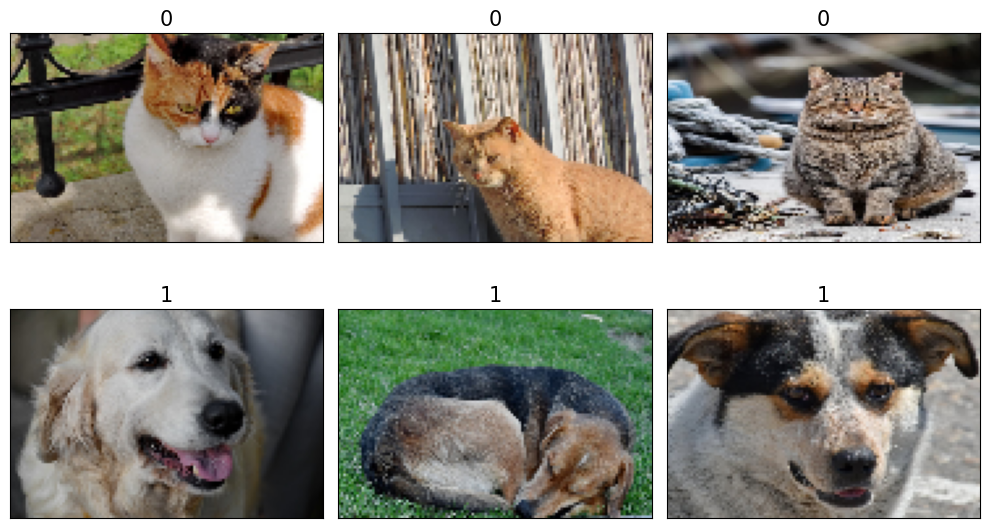

In [21]:
# 在此可视化处理之后的数据.
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose(1, 2, 0))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

#### 从torchvision.datasets库中读取已有数据

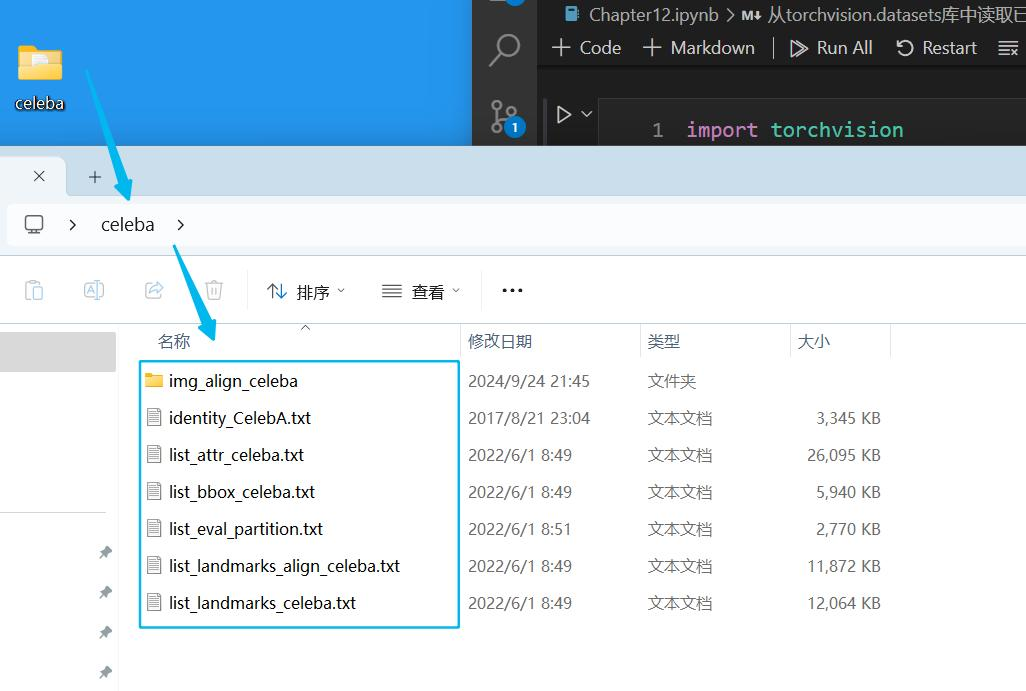

In [37]:
# 数据手动下载，放置于桌面，目录结构.
# https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter12/figures/16646.jpg', 
      width=450)

In [36]:
import torchvision

# image_path = '../Python-MachineLearning/Datasets'
image_path = "C:/Users/Administrator/Desktop"
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', 
                                             target_type='attr', 
                                             download=False)